<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD17TAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [ ]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

CPU times: total: 1.33 s
Wall time: 1.89 s


In [ ]:
features = 'features.txt'
subject_train = 'subject_train.txt'
X_train = 'X_train.txt'
subject_test = 'subject_test.txt'
X_test = 'X_test.txt'
y_train = 'y_train.txt'
y_test = 'y_test.txt'

In [ ]:
%%time

features = (pd.read_csv(filepath_or_buffer=features,
                        sep='?',
                        header=None)
              .squeeze('columns'))

CPU times: total: 15.6 ms
Wall time: 16.6 ms


In [ ]:
features

0                           1 tBodyAcc-mean()-X
1                           2 tBodyAcc-mean()-Y
2                           3 tBodyAcc-mean()-Z
3                            4 tBodyAcc-std()-X
4                            5 tBodyAcc-std()-Y
                         ...                   
556        557 angle(tBodyGyroMean,gravityMean)
557    558 angle(tBodyGyroJerkMean,gravityMean)
558                    559 angle(X,gravityMean)
559                    560 angle(Y,gravityMean)
560                    561 angle(Z,gravityMean)
Name: 0, Length: 561, dtype: object

In [ ]:
%%time

subject_train = (pd.read_csv(filepath_or_buffer=subject_train,
                             header=None)
                   .squeeze('columns'))

CPU times: total: 0 ns
Wall time: 5.53 ms


In [ ]:
subject_train

0        1
1        1
2        1
3        1
4        1
        ..
7347    30
7348    30
7349    30
7350    30
7351    30
Name: 0, Length: 7352, dtype: int64

In [ ]:
%%time

X_train = (pd.read_csv(filepath_or_buffer=X_train,
                       header=None,
                       names=features,
                       delim_whitespace=True)
             .assign(subject_train=subject_train))
X_train.set_index(keys='subject_train',
                  drop=True,
                  append=True,
                  inplace=True)

<timed exec>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


CPU times: total: 1.33 s
Wall time: 1.34 s


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0, 1) to (7351, 30)
Columns: 561 entries, 1 tBodyAcc-mean()-X to 561 angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
%time
print('A quantidade de valores ausentes em X_train é', X_train.isna().sum().sum())


CPU times: total: 0 ns
Wall time: 0 ns
A quantidade de valores ausentes em X_train é 0


In [ ]:
%%time

subject_test = (pd.read_csv(filepath_or_buffer=subject_test,
                            header=None)
                   .squeeze('columns'))


CPU times: total: 15.6 ms
Wall time: 5.56 ms


In [ ]:
%%time

X_test = (pd.read_csv(filepath_or_buffer=X_test,
                      header=None,
                      names=features,
                      delim_whitespace=True)
             .assign(subject_test=subject_test))

<timed exec>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


CPU times: total: 578 ms
Wall time: 593 ms


In [ ]:
%%time

X_test.set_index(keys='subject_test',
                 drop=True,
                 append=True,
                 inplace=True)

CPU times: total: 0 ns
Wall time: 3.52 ms


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2947 entries, (0, 2) to (2946, 24)
Columns: 561 entries, 1 tBodyAcc-mean()-X to 561 angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


In [ ]:
%time
print('A quantidade de valores ausentes em X_test é', X_test.isna().sum().sum())


CPU times: total: 0 ns
Wall time: 0 ns
A quantidade de valores ausentes em X_test é 0


In [ ]:
%%time

os.makedirs(name='./output', exist_ok=True)
X_train.to_csv(path_or_buf='./output/X_train.csv')
X_test.to_csv(path_or_buf='./output/X_test.csv')

CPU times: total: 4.3 s
Wall time: 6.86 s


In [ ]:
%%time

X_train = pd.read_csv('./output/X_train.csv', index_col=['Unnamed: 0', 'subject_train'])
X_test = pd.read_csv('./output/X_test.csv', index_col=['Unnamed: 0', 'subject_test'])

CPU times: total: 875 ms
Wall time: 926 ms


- 1.7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

In [ ]:
%%time

X_train = X_train.iloc[:,:3]
X_test = X_test.iloc[:,:3]

CPU times: total: 0 ns
Wall time: 766 μs


In [ ]:
%%time

y_train = (pd.read_csv(filepath_or_buffer=y_train,
                      header=None)
             .squeeze('columns'))

CPU times: total: 0 ns
Wall time: 4.53 ms


In [ ]:
%%time

y_test = (pd.read_csv(filepath_or_buffer=y_test,
                      header=None)
            .squeeze('columns'))

CPU times: total: 0 ns
Wall time: 7.31 ms


In [ ]:
%%time

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)
CPU times: total: 0 ns
Wall time: 0 ns


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [ ]:
%%time

print('Quantidade de variáveis utilizadas em X_train:', X_train.shape[1])
print('Quantidade de variáveis utilizadas em X_test:', X_test.shape[1])


Quantidade de variáveis utilizadas em X_train: 3
Quantidade de variáveis utilizadas em X_test: 3
CPU times: total: 0 ns
Wall time: 1 ms


In [ ]:
%%time

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)


CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

clf

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [ ]:
%%time

path = clf.cost_complexity_pruning_path(X=X_train, y=y_train)

CPU times: total: 46.9 ms
Wall time: 33.7 ms


In [ ]:
%%time

path

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alphas': array([0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
        2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
        5.84401136e-05, 6.17808017e-05, 6.59866112e-05, 6.73768888e-05,
        7.02851049e-05, 7.74168145e-05, 7.99585551e-05, 8.01474017e-05,
        8.28222484e-05, 8.29342439e-05, 8.49667199e-05, 9.21474511e-05,
        9.63598696e-05, 1.02953015e-04, 1.04280015e-04, 1.05722623e-04,
        1.06211126e-04, 1.10109332e-04, 1.20580361e-04, 1.24186720e-04,
        1.32053657e-04, 1.35233977e-04, 1.36017410e-04, 1.41963138e-04,
        1.46351627e-04, 1.47352194e-04, 1.49244166e-04, 1.49492770e-04,
        1.50482754e-04, 1.51968146e-04, 1.55713461e-04, 1.60511546e-04,
        1.60628990e-04, 1.64239147e-04, 1.67323005e-04, 1.74342668e-04,
        1.74907961e-04, 1.75578030e-04, 1.78985873e-04, 1.81439304e-04,
        1.85996704e-04, 1.87333070e-04, 1.89065980e-04, 1.89796602e-04,
        1.96759215e-04, 2.01481091e-04, 2.01919050

In [ ]:
%%time

print('Tamanho total de ccp_alphas:', len(path.ccp_alphas))
print('Tamanho reduzido[::5] de ccp_alphas:', len(path.ccp_alphas[::5]))

ccp_alphas, impurities = path.ccp_alphas[::5], path.impurities[::5]

Tamanho total de ccp_alphas: 233
Tamanho reduzido[::5] de ccp_alphas: 47
CPU times: total: 0 ns
Wall time: 1.02 ms


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [ ]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

clfs


CPU times: total: 2.56 s
Wall time: 2.57 s


[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.849888595264009e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.598661121074139e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=8.01474017245638e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=9.635986956873458e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00011010933208974519, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00013601741022850914, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0001494927703823909, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00016062899036919714, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00017557802954333655, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00018906598037098836, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00020286677471008027, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00020545916743156412, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0002108269858541

In [ ]:
%%time

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test,  y_test ) for clf in clfs]

CPU times: total: 188 ms
Wall time: 190 ms


In [ ]:
%%time

print('Acurácia máxima de train_scores:', max(train_scores))
print('Acurácia máxima de test_scores:', max(test_scores))

Acurácia máxima de train_scores: 1.0
Acurácia máxima de test_scores: 0.4472344757380387
CPU times: total: 0 ns
Wall time: 0 ns


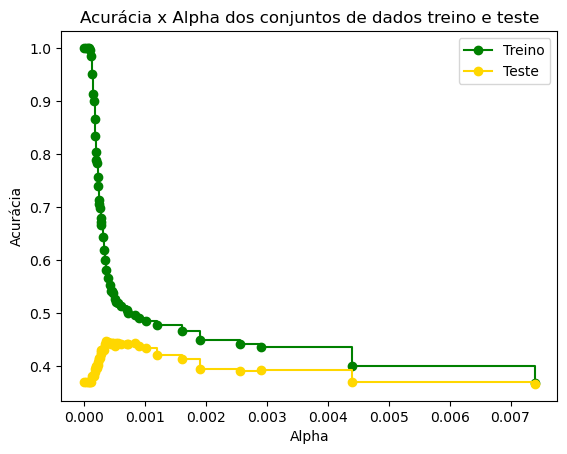

CPU times: total: 203 ms
Wall time: 189 ms


In [ ]:
%%time

fig, ax = plt.subplots()

ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')

ax.set_title(label='Acurácia x Alpha dos conjuntos de dados treino e teste')

ax.plot(ccp_alphas, train_scores, marker='o', label='Treino', color='green', drawstyle='steps-post')

ax.plot(ccp_alphas, test_scores , marker='o', label='Teste' , color='gold', drawstyle='steps-post')

ax.legend()

plt.show()

In [ ]:
%%time

best_tree_index = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
print('O indice da melhor árvore é', best_tree_index)

O indice da melhor árvore é 25
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

best_tree = clfs[best_tree_index]
print('A melhor árvore é', best_tree)

A melhor árvore é DecisionTreeClassifier(ccp_alpha=0.00036355986671961156, random_state=42)
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

print('A melhor acurácia obtida com as três variáveis é de',
      best_tree.score(X=X_test, y=y_test))

A melhor acurácia obtida com as três variáveis é de 0.4472344757380387
CPU times: total: 15.6 ms
Wall time: 4 ms


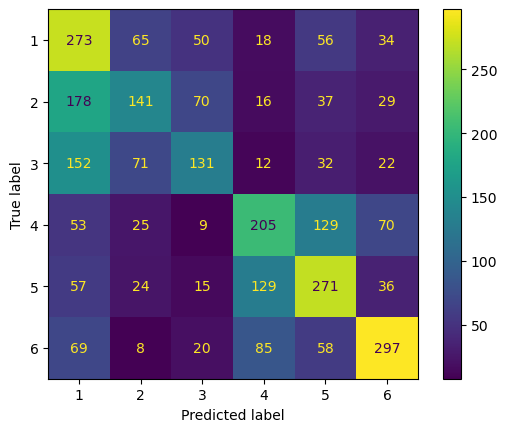

CPU times: total: 234 ms
Wall time: 222 ms


In [ ]:
%%time

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, X=X_test, y=y_test);
plt.show()


In [ ]:
%%time

X_train = pd.read_csv('./output/X_train.csv', index_col=['Unnamed: 0', 'subject_train'])
X_test = pd.read_csv('./output/X_test.csv', index_col=['Unnamed: 0', 'subject_test'])

CPU times: total: 781 ms
Wall time: 836 ms


In [ ]:
%%time

y_train = (pd.read_csv(filepath_or_buffer='y_train.txt',
                      header=None)
             .squeeze('columns'))

CPU times: total: 0 ns
Wall time: 14.6 ms


In [ ]:
%%time

y_test = (pd.read_csv(filepath_or_buffer='y_test.txt',
                      header=None)
            .squeeze('columns'))

CPU times: total: 0 ns
Wall time: 5.52 ms


In [ ]:
%%time
print('Quantidade de variáveis utilizadas em X_train:', X_train.shape[1])
print('Quantidade de variáveis utilizadas em X_test:', X_test.shape[1])



Quantidade de variáveis utilizadas em X_train: 561
Quantidade de variáveis utilizadas em X_test: 561
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time
path = clf.cost_complexity_pruning_path(X=X_train, y=y_train)

CPU times: total: 3.34 s
Wall time: 3.37 s


In [ ]:
%%time
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('Tamanho total de ccp_alphas:', len(ccp_alphas))


Tamanho total de ccp_alphas: 64
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

CPU times: total: 4min 39s
Wall time: 4min 41s


In [ ]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test,  y_test ) for clf in clfs]

CPU times: total: 1.17 s
Wall time: 1.17 s


In [ ]:
%%time
print('Acurácia máxima em train_scores:', max(train_scores))
print('Acurácia máxima em test_scores:', max(test_scores))

Acurácia máxima em train_scores: 1.0
Acurácia máxima em test_scores: 0.8788598574821853
CPU times: total: 0 ns
Wall time: 0 ns


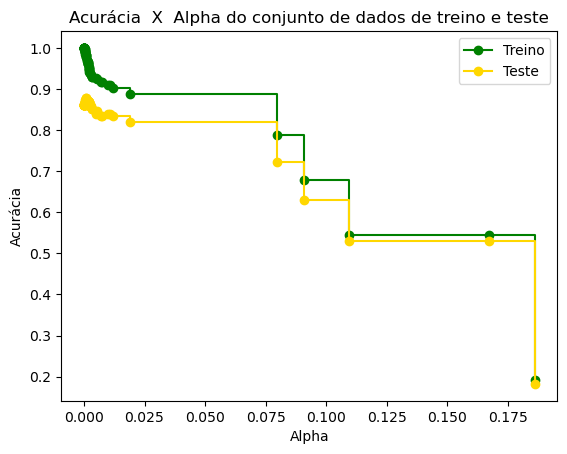

CPU times: total: 141 ms
Wall time: 133 ms


In [ ]:
%%time

fig, ax = plt.subplots()

ax.set_xlabel(xlabel='Alpha')

ax.set_ylabel(ylabel='Acurácia')

ax.set_title(label='Acurácia  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas, train_scores, marker='o', label='Treino', color='green', drawstyle='steps-post')

ax.plot(ccp_alphas, test_scores , marker='o', label='Teste' , color='gold', drawstyle='steps-post')

ax.legend()

plt.show()

-------------------

In [ ]:
%%time
best_tree_index = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
best_tree = clfs[best_tree_index]


CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

print('A melhor acurácia que se pode obter com todas as variáveis é:',
      best_tree.score(X=X_test, y=y_test))

A melhor acurácia que se pode obter com todas as variáveis é: 0.8788598574821853
CPU times: total: 15.6 ms
Wall time: 17.1 ms


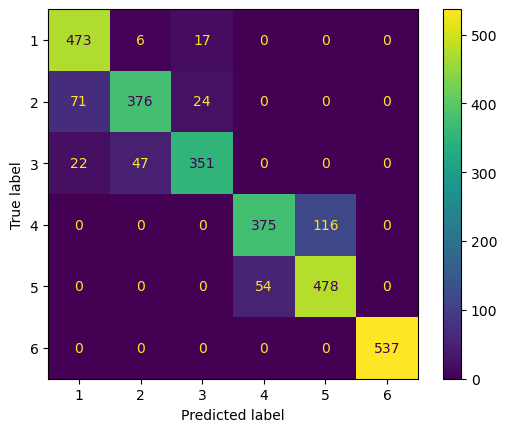

CPU times: total: 141 ms
Wall time: 148 ms


In [ ]:
%%time

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, X=X_test, y=y_test);
plt.show()


-----------------------------

-----------------------------